In [27]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization


In [5]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [6]:
#create model
model=Sequential ()

In [7]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [8]:
#flatten the dimension of the image
model.add(Flatten())

In [9]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [10]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [11]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [12]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 202s 107ms/step - loss: 0.1777 - accuracy: 0.9548 - val_loss: 0.0765 - val_accuracy: 0.9764
Epoch 2/5
1875/1875 [==============================] - 205s 109ms/step - loss: 0.0623 - accuracy: 0.9812 - val_loss: 0.0862 - val_accuracy: 0.9739
Epoch 3/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0773 - val_accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.0920 - val_accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 200s 107ms/step - loss: 0.0266 - accuracy: 0.9919 - val_loss: 0.0929 - val_accuracy: 0.9800


In [13]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.09287292510271072, 0.9800000190734863]


In [14]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 126ms/step
[[9.2221031e-14 5.9426531e-14 3.7647916e-11 8.8048302e-10 2.0471994e-04
  2.0997410e-09 4.0648691e-14 7.7111654e-06 1.1065460e-07 9.9978751e-01]]


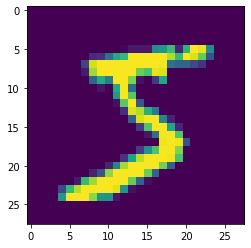

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
(train_images, train_labels) = datasets.mnist.load_data()
import matplotlib.pyplot as plt
train_images = train_images[0] / 255
plt.imshow(train_images[0])

In [18]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [19]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

In [20]:
# Save the model
model.save('models/mnistCNN.h5')

In [22]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 71ms/step
[[7.9245907e-12 8.7344948e-19 6.4173090e-12 1.1996775e-11 2.2141147e-16
  4.1880456e-18 1.5928220e-23 1.0000000e+00 6.2035631e-13 2.0127895e-12]
 [2.7044177e-06 1.9362913e-06 9.9988782e-01 1.2599278e-08 1.4173492e-10
  1.7032900e-13 1.0616378e-04 2.1246551e-14 1.2515808e-06 2.0814476e-14]
 [2.0580188e-10 9.9995089e-01 1.2595250e-07 7.4438069e-14 2.4884939e-06
  2.0877899e-10 2.7029878e-09 8.5826218e-10 4.6530735e-05 7.6779910e-10]
 [1.0000000e+00 4.2832023e-14 2.8430047e-10 2.7173563e-17 2.2270385e-11
  5.8153168e-13 3.8477905e-09 3.4167412e-15 7.2158973e-10 5.7200067e-13]]


In [29]:
def featureExtractor(path):
    import numpy as np
